<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis - Part 2

### Contents:
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Further Investigation](#Further-Investigation)

## Exploratory Data Analysis

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Loading cleaned datasets
# SAT
sat_df = pd.read_csv('../data/cleaned/sat_df_cleaned.csv', index_col=[0])
sat_2019_ca = pd.read_csv('../data/cleaned/sat_2019_ca_df_cleaned.csv', index_col=[0])
sat_2019_ca_11 = pd.read_csv('../data/cleaned/sat_2019_ca_11_cleaned.csv', index_col=[0])
sat_2019_ca_12 = pd.read_csv('../data/cleaned/sat_2019_ca_12_cleaned.csv', index_col=[0])
sat_2019_ca_both = pd.read_csv('../data/cleaned/sat_2019_ca_both_cleaned.csv', index_col=[0])

# ACT
act_df = pd.read_csv('../data/cleaned/act_df_cleaned.csv', index_col=[0])
act_2019_ca = pd.read_csv('../data/cleaned/act_2019_ca_df_cleaned.csv', index_col=[0])

# Grades
sat_2019_by_intended_major = pd.read_csv('../data/cleaned/sat_2019_by_college_major_cleaned.csv', index_col=[0])
accepted_range = pd.read_csv('../data/cleaned/sat_act_by_college_cleaned.csv', index_col=[0])

#### SAT and ACT has been used by colleges as a requirement for a long period of time. 
Let's investigate how different colleges accepts students with different scores of SAT and ACT.

In [3]:
# Check accepted range
accepted_range.head(3)

,school,test_optional,applied_class_yr,policy,num_applicants,acceptance_rate,sat_25,sat_75,act_25,act_75
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,0.043,1440.0,1570.0,32.0,35.0
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,0.047,1460.0,1580.0,33.0,35.0
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,0.055,1440.0,1570.0,32.0,35.0


In [4]:
# Check info
accepted_range.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 415
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school            401 non-null    object 
 1   test_optional     401 non-null    object 
 2   applied_class_yr  376 non-null    object 
 3   policy            401 non-null    object 
 4   num_applicants    401 non-null    int64  
 5   acceptance_rate   401 non-null    float64
 6   sat_25            401 non-null    float64
 7   sat_75            401 non-null    float64
 8   act_25            401 non-null    float64
 9   act_75            401 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 34.5+ KB


In [5]:
# Create columns of interested features
std_cols = ['sat_25','sat_75','act_25','act_75']

In [53]:
# Create columns to use as title on the plot
std_cols_rename = ['SAT 25th','SAT 75th','ACT 25th','ACT 75th']

In [54]:
# Create a dictionary of standard deviation
accepted_range_std_dict = {c : accepted_range[c].std() for c in std_cols}

In [55]:
# Create a dictionary of skewness
accepted_range_skew_dict = {c : accepted_range[c].skew() for c in std_cols}

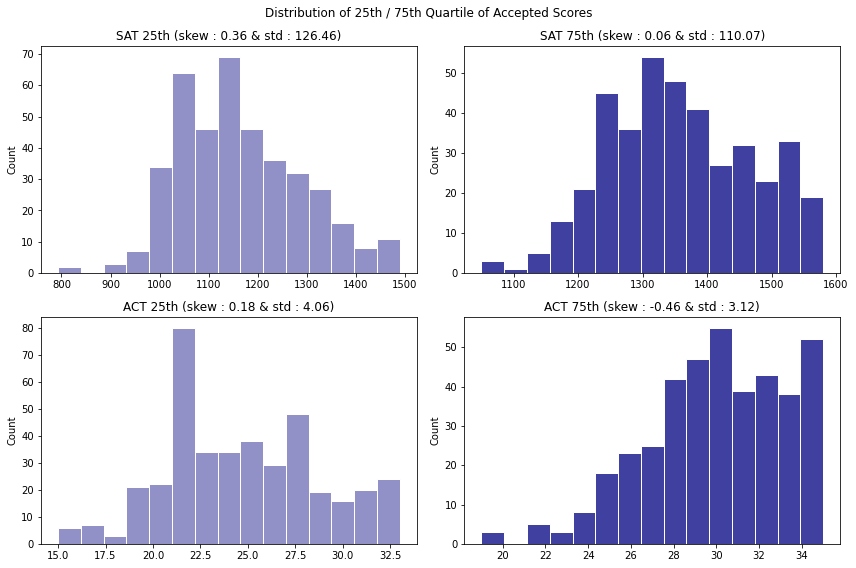

In [56]:
# Plot a distribution of accepted SAT and ACT scores

colors = ['#6D6DB6','#000080','#6D6DB6','#000080']

plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of 25th / 75th Quartile of Accepted Scores")

for n,col in enumerate(std_cols):
    
    ax = plt.subplot(2,2,n+1
                    )
    sns.histplot(x = col,
                 data = accepted_range,
                 bins = 15,
                 ax=ax,
                 color = colors[n],
                 edgecolor = 'white'
                )
    
    skew = round(accepted_range_skew_dict[col],2)
    std = round(accepted_range_std_dict[col],2)
    ax.set_xlabel("")
    ax.set_title(f'{std_cols_rename[n]} (skew : {skew} & std : {std})')

plt.tight_layout()
plt.savefig('../figure/sat_act_accepted_distribution.jpg');

__Interpretation__
- Different universities accepts wide range of ACT and SAT scores
- SAT : lower bound distribution is positively skewed and upper bound distribution almost have no skew
- This means that among the accepted students, the scores are more likely to be on the low side
- ACT : lower bound is slightly positively skewed and upper bound is highly negatively skewed
- This either means more people can achieve high scores for the ACT
- This suggests that there are differences in the difficulty of SAT and ACT



#### SAT and ACT participation varies from state to state.
Let's investigate how different states participates in each tests, and how well they do.

In [10]:
# Pivot by year and calculate average participation by state
sat_year_pivot_parti = sat_df.reset_index().pivot('state','year','participation')
sat_year_pivot_parti['sat_avg'] = (sat_year_pivot_parti[2017]+sat_year_pivot_parti[2018]+sat_year_pivot_parti[2019])/3

In [11]:
# Pivot by year and calculate average participation by state
act_year_pivot_parti = act_df.reset_index().pivot('state','year','participation')
act_year_pivot_parti['act_avg'] = (act_year_pivot_parti[2017]+act_year_pivot_parti[2018]+act_year_pivot_parti[2019])/3

In [12]:
# Merge SAT and ACT participation by states

sat_act_parti_df = sat_year_pivot_parti.merge(act_year_pivot_parti,left_on='state',right_on='state',suffixes=('_sat', '_act'))
sat_act_parti_df.head(3)

year,2017_sat,2018_sat,2019_sat,sat_avg,2017_act,2018_act,2019_act,act_avg
state,,,,,,,,
Alabama,0.05,0.06,0.07,0.060000,1.00,1.00,1.00,1.000000
Alaska,0.38,0.43,0.41,0.406667,0.65,0.33,0.38,0.453333
Arizona,0.30,0.29,0.31,0.300000,0.62,0.66,0.73,0.670000


In [13]:
# Select column to plot
corr_cols = ['2017_sat', '2018_sat','2019_sat','2017_act','2018_act', '2019_act']

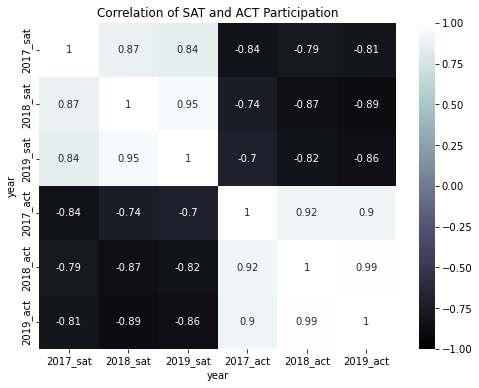

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

# plot
sns.heatmap(sat_act_parti_df[corr_cols].corr(),
            annot=True,
            cmap='bone',
            vmin = -1,
            vmax = 1,
            ax=ax)

# style
ax.set_title('Correlation of SAT and ACT Participation');

# States that has high participation in SAT tends to have low participation in ACT
# Meaning generally, different states will choose one or the other
# And different state will make one more accessible than the other

# Once the test becomes selective - people are more likely to get better scores
# Meaning both the SAT and ACT can be exploited in some ways - i.e. private tutoring

# Because if it really is a fair test, then the average of states with selective participation would be the same as
# states with mandatory or free participation. In another word, the rank of states would've been much clearer

__Interpretation:__
- Participation in SAT or one state correlates negatively with participation of ACT in the same state (in every year)
- This make sense because SAT and ACT are provided for free certain states
- Let's see how this correlates in the form of a regplot

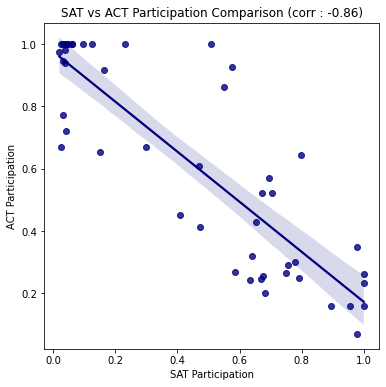

In [49]:
# Investigate further using regplot
fig, axes = plt.subplots(figsize=(6,6))

# plot
sns.regplot(x='sat_avg',y='act_avg',data=sat_act_parti_df,ax=axes,color='#000080')

# characteristic
graph_corr = round(sat_act_parti_df[['sat_avg','act_avg']].corr()['act_avg']['sat_avg'],2)

# style title
axes.set_title(f'SAT vs ACT Participation Comparison (corr : {graph_corr})')

# style label
axes.set_xlabel('SAT Participation')
axes.set_ylabel('ACT Participation')
plt.savefig('../figure/sat_act_participation_scatter.jpg');

__Interpretation:__
- Combining the data from 2017-2019 the average participation for every state in the US combines to the pattern stated above.
- Let's investigate more into how participation correlates with scores

Comparison within SAT and ACT data whether participation plays a part in score

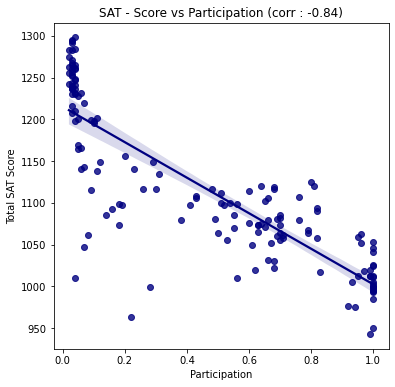

In [51]:
# SAT score and participation
fig, axes = plt.subplots(figsize=(6,6))

# plot
sns.regplot(y = 'total', x= 'participation', data = sat_df,color='#000080')

# characteristic
graph_corr = round(sat_df[['total','participation']].corr()['total']['participation'],2)

# style title
axes.set_title(f'SAT - Score vs Participation (corr : {graph_corr})')

# style label
axes.set_ylabel('Total SAT Score')
axes.set_xlabel('Participation')
plt.savefig('../figure/sat_score_vs_participation.jpg');
# The lower the participation rate of each state, the higher they tend to score

__Interpretation:__
- There is a clear negative correlation of participation and score within the SAT itself
- This means that states with lower participation tends to do better
- The reason for that is because states with lower participation rate consists of students who chose to do the SAT, while states with higher participation rate are generally states that offer free or required SAT

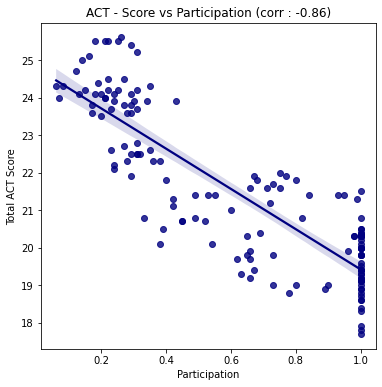

In [52]:
# ACT score and participation
fig, axes = plt.subplots(figsize=(6,6))

# plot
sns.regplot(y = 'composite', x= 'participation', data = act_df,color='#000080')

# characteristic
graph_corr = round(act_df[['composite','participation']].corr()['composite']['participation'],2)

# style title
axes.set_title(f'ACT - Score vs Participation (corr : {graph_corr})')

# style label
axes.set_ylabel('Total ACT Score')
axes.set_xlabel('Participation')
plt.savefig('../figure/act_score_vs_participation.jpg');
# The lower the participation rate of each state, the higher they tend to score

__Interpretation:__
- Similar trend with the SAT
- Combining this with the previous interpretation ('Some people do better in SAT while some do better in the ACT')
- The idea that people who know that they can do better in certain exams, will choose to do that exam
- But only knowing which test they will do better in is not enough, they need to have the opportunity to exercise that privilege
- We should investigate further into how wealth plays a part in this

----

#### Let's investigate the correlation with income
We will use county income to check for correlation

In [18]:
# Import county income csv
county_income = pd.read_csv('../data/cleaned/ca_capita_wiki.csv')

In [19]:
# Reset index
county_income = county_income.reset_index()

In [20]:
# Rename column
county_income.rename(columns = {'County':'county','Median family income':'median_family_income'},inplace=True)

In [21]:
# Import grade 11 data from california and select only school data

sat_2019_ca_11_school = sat_2019_ca_11[sat_2019_ca_11['record_type'] == 'S']

In [22]:
# Check correlation with median family income
school_income_11 = sat_2019_ca_11_school.merge(county_income[['county','median_family_income']],how='left',\
                                           left_on='county_name',right_on='county')

In [23]:
# Remove columns with zero takers
school_income_11 = school_income_11[school_income_11['grade_11_total_bm_pct'] != 0]

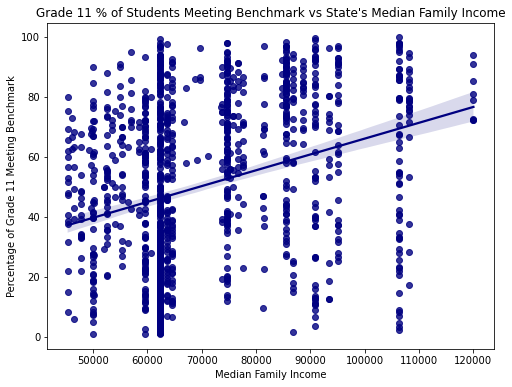

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

# style
ax.set_title("Grade 11 % of Students Meeting Benchmark vs State's Median Family Income")

# plot
ax = sns.regplot(x = 'median_family_income',
                 y = 'grade_11_total_bm_pct',
                 data = school_income_11,
                 color='#000080')

plt.xlabel('Median Family Income')
plt.ylabel('Percentage of Grade 11 Meeting Benchmark')
plt.savefig('../figure/grade_11_vs_fam_income.jpg');

__Interpretation:__
- The higher the median family income is in that state, the higher the percentage of grade 11 students meeting SAT benchmark is
- This supports our previous idea that wealth plays a part in how well students score
- Let's check whether this is the same for grade 12

In [25]:
# Import grade 12 california data and select only school data
sat_2019_ca_12_school = sat_2019_ca_12[sat_2019_ca_12['record_type'] == 'S']

In [26]:
# Merge grade 12 SAT scores and median family income
school_income_12 = sat_2019_ca_12_school.merge(county_income[['county','median_family_income']],how='left',\
                                               left_on='county_name',right_on='county')

In [27]:
# Drop schools without participants
school_income_12 = school_income_12[school_income_12['grade_12_total_bm_pct'] != 0]

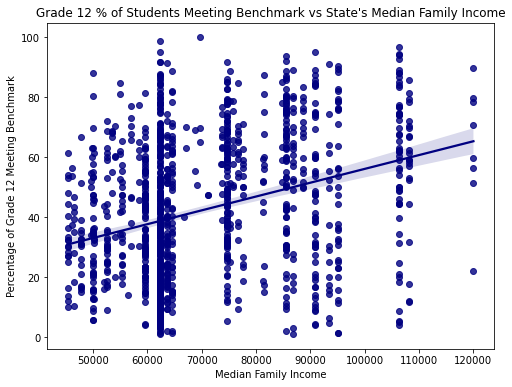

In [28]:
fig, ax = plt.subplots(figsize=(8,6))

# style
ax.set_title("Grade 12 % of Students Meeting Benchmark vs State's Median Family Income")

# plot
ax = sns.regplot(x = 'median_family_income',
                 y = 'grade_12_total_bm_pct',
                 data = school_income_12,
                color='#000080')

plt.xlabel('Median Family Income')
plt.ylabel('Percentage of Grade 12 Meeting Benchmark')
plt.savefig('../figure/grade_12_vs_fam_income.jpg');

__Interpretation:__
- For grade 12, the trend remains the same
- This make sense because families with higher income means that children from that household will not have to work part time job, giving them more time to focus on revision and study, or even are in schools with better teachers
- Another thing that wealth provides is the ability to not only pay for the test that they might perform better (that we discussed) but to pay for practices in exam condition (if they're in states that don't offer free tests)
- Since the SAT and the ACT can be taken many times - let's investigate whether this 

---

#### We will investigate scores of school that has both grade 11 and grade 12 test takers
Although schools that has both grade 11 and grade 12 test takers doesn't mean that they are schools that rich students pay to take more exam practices, this investigation could verify whether more practice will correlates to better score.

In [29]:
# Check for schools with both grade 11 and grade 12 - (Maybe compare it with just grade 11)
# Drop schools without takers - it doesn't help with our analysis anyway
sat_2019_ca_both = sat_2019_ca_both[(sat_2019_ca_both['grade_11_takers'] != 0 ) & (sat_2019_ca_both['grade_12_takers'] != 0 )]

In [30]:
# Select only school records
sat_2019_ca_both_school = sat_2019_ca_both[sat_2019_ca_both['record_type'] == 'S']

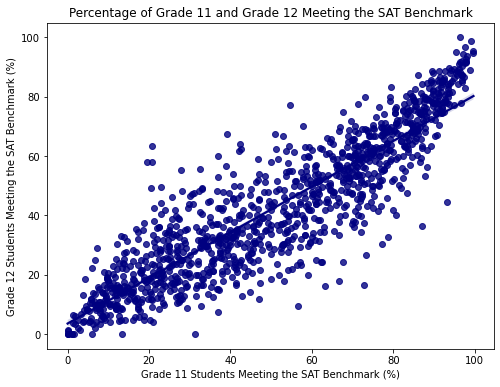

In [31]:
# Scatter plot of % of grade 11 meeting the benchmark with % of grade 12 meeting the benchmark
fig, ax = plt.subplots(figsize=(8,6))

# Plot
sns.regplot(x = 'grade_11_total_bm_pct', y = 'grade_12_total_bm_pct', data = sat_2019_ca_both_school,color='#000080')

# Style
ax.set_title("Percentage of Grade 11 and Grade 12 Meeting the SAT Benchmark")
plt.xlabel('Grade 11 Students Meeting the SAT Benchmark (%)')
plt.ylabel('Grade 12 Students Meeting the SAT Benchmark (%)')
plt.savefig('../figure/grade_11_vs_grade_12.jpg');

__Interpretation:__
- Positive correlation can be clearly seen from this
- Since this is a snapshot of one year, we can see that schools with high % of grade 11 students meeting the benchmark tends to have high % of grade 12 students meeting the benchmark as well
- Meaning more and more practices will allow students to do better (at least not worse)

---

## Conclusions and Recommendations

*The test optional policy should be extended for more than one year for universities in the states.* 
- *Since both tests are structured different, individual will perform better in one over the other. This allows students with the privilege of selecting their preferred tests to have more advantage.* 
- *Apart from that, students who gets their preferred exam for free (as some states do provide them) also gets more advantage over the people who don't.*
- *Not only do choices matter, but practice under exam condition definitely plays a part in how well students perform. Students who get more training, tends to score higher.*
- *Additionally, students can take the exam as many times as they want (12 times for the ACT) and select the highest score. Therefore, students with the opportunity will have more advantage during university application*

*For these reasons, standardized tests should not be required for universities not only this one year, but for future generations as well*

## Further Investigation

*This project was done with limited time and data available, if time permits here are the potential areas that might be worth investigating:*

- *Separate schools into school types - magnet school, public school, private school etc. - and investigate the differences of performance from all these schools*
- *The purpose of 'test optional' admission policy is to create allow equal opportunity for people with different background, how effective this is requires long term tracking of university's learning environment or students quality based on their own internal tests. This will be an interesting idea to track metrics of this movement*